# Objectives

1. Understand the sales patterns across stores and products.
2. Identify factors that influence sales, such as promotions, holidays, or external factors like oil prices.
3. Forecast future sales to make informed business decisions (inventory management, promotions, etc.).


1. What are the sales trends across time?
2. How do holidays, promotions, and oil prices affect sales?
3. Which products or stores perform best?
4. What are the outliers in the data (e.g., unusually high/low sales)?
5. Are there seasonal patterns in sales (e.g., monthly, weekly)?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\wasid\Downloads\store-sales-time-series-forecasting\train.csv")
test = pd.read_csv(r"C:\Users\wasid\Downloads\store-sales-time-series-forecasting\test.csv")
transaction = pd.read_csv(r"C:\Users\wasid\Downloads\store-sales-time-series-forecasting\transactions.csv")
store = pd.read_csv(r"C:\Users\wasid\Downloads\store-sales-time-series-forecasting\stores.csv")
sample = pd.read_csv(r"C:\Users\wasid\Downloads\store-sales-time-series-forecasting\sample_submission.csv")
oil = pd.read_csv(r"C:\Users\wasid\Downloads\store-sales-time-series-forecasting\oil.csv")
holidays = pd.read_csv(r"C:\Users\wasid\Downloads\store-sales-time-series-forecasting\holidays_events.csv")


# Cleaning & Analyzing all datasets

In [3]:
#showing  train dataset
train.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [4]:
# rows, columns
train.shape

(3000888, 6)

In [5]:
# stats summarized
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [6]:
# more details on train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
# checking for null values
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [8]:
# removing null rows
train.dropna(inplace=True)

In [9]:
train.shape

(3000888, 6)

In [10]:
# checking for duplicates
train.duplicated().sum()

0

 For transaction Dataset

In [11]:
transaction.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [12]:
transaction.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


For test dataset

In [13]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [14]:
test.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


For Store

In [15]:
store.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [16]:
store.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [17]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


For Oil Dataset

In [18]:
# What does DCOILWTICO stand for?
# D: Crude oil
# COIL: West Texas Intermediate
# WTICO: Cushing, Oklahoma
oil.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [19]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [20]:
oil['dcoilwtico']=oil['dcoilwtico'].fillna(0)

In [21]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [22]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


For Holidays Dataset

In [23]:
holidays.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


For Sample dataset

In [24]:
sample.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [25]:
sample.describe()

,id,sales
count,2.851200e+04,28512.0
mean,3.015144e+06,0.0
std,8.230850e+03,0.0
min,3.000888e+06,0.0
25%,3.008016e+06,0.0
50%,3.015144e+06,0.0
75%,3.022271e+06,0.0
max,3.029399e+06,0.0


In [26]:
# All we note is to set date datatype

In [27]:
# Converting all datset date to time format
train['date']= pd.to_datetime(train['date'])
transaction['date']=pd.to_datetime(transaction['date'])
test['date']= pd.to_datetime(test['date'])
oil['date']= pd.to_datetime(oil['date'])
holidays['date']= pd.to_datetime(holidays['date'])

### Dealing with train Datset

In [28]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [29]:
# successfully changed the data column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


### Removing detected outliers of Sales in train column

In [30]:
train.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


<Axes: ylabel='sales'>

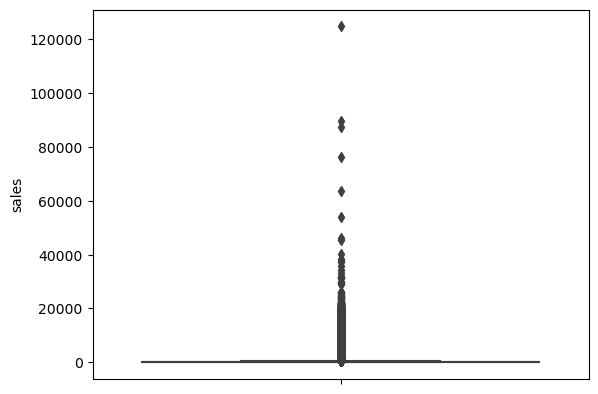

In [31]:
# Outliers
sns.boxplot(y=train['sales'] )

In [32]:
Q1=train['sales'].quantile(0.25) # 25%
Q3=train['sales'].quantile(0.75) # 75%
IQR = Q3 - Q1 # Inter Quantile Range
# threshold boundaries
lower_bound = Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR

In [33]:
# Removing outliers
train = train[(train['sales']>=lower_bound) & (train['sales']<=upper_bound)]

In [34]:
print(f"Data shape before: {train.shape}")


Data shape before: (2553783, 6)


## Analyzing Top catagories t on the basis of Sales

In [35]:
category_sales=train.groupby('family')['sales'].sum().sort_values(ascending=False).head(10)

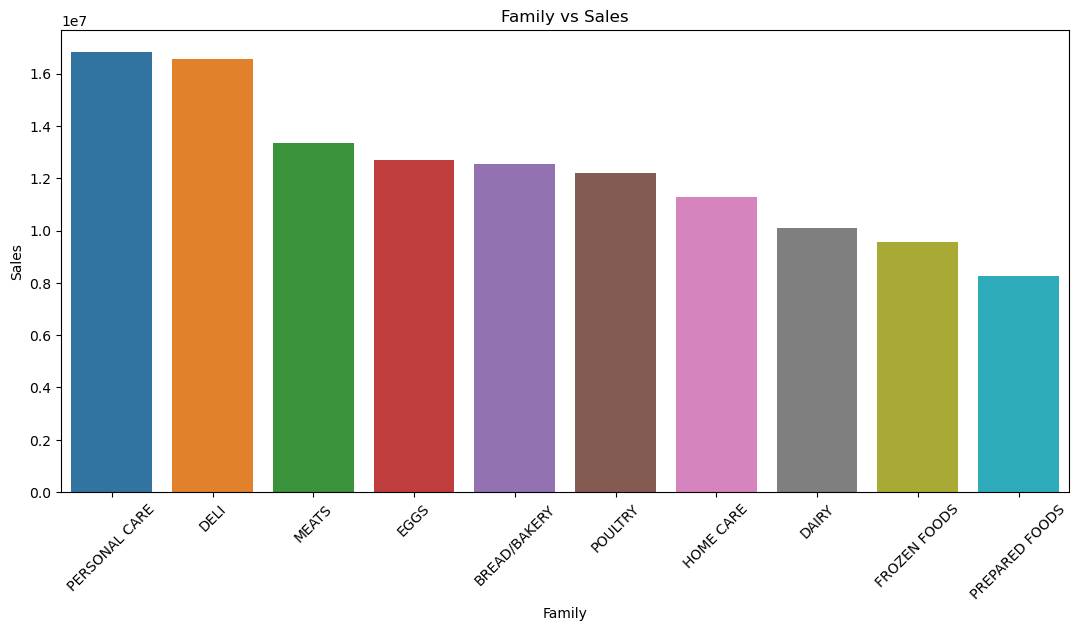

In [36]:
plt.figure(figsize=(13,6))
sns.barplot(x=category_sales.index , y=category_sales.values )
plt.title("Family vs Sales")
plt.xlabel("Family")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [37]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

### Top 15 store performance  on the basis of sales

In [38]:
store_sale=train.groupby("store_nbr")['sales'].sum().sort_values(ascending=False).head(15)

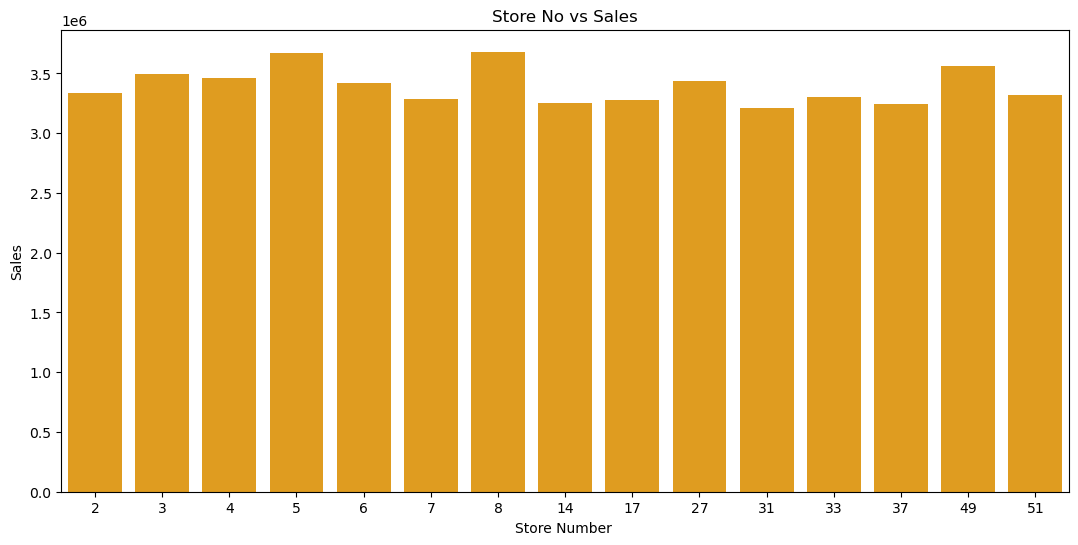

In [39]:
plt.figure(figsize=(13,6))
sns.barplot(x=store_sale.index , y=store_sale.values , color='orange')
plt.title("Store No vs Sales")
plt.xlabel("Store Number ")
plt.ylabel("Sales")

plt.show()

### Top 10 Item/Product performed well on the basis of sales

In [40]:
prod_sale=train.groupby("id")['sales'].sum().sort_values(ascending=False).head(10)
prod_sale

id
292804     489.6150
258366     489.6150
1611022    489.6140
1754751    489.6120
85248      489.6110
883848     489.6100
549412     489.6080
2788821    489.6070
634601     489.6060
790440     489.5988
Name: sales, dtype: float64

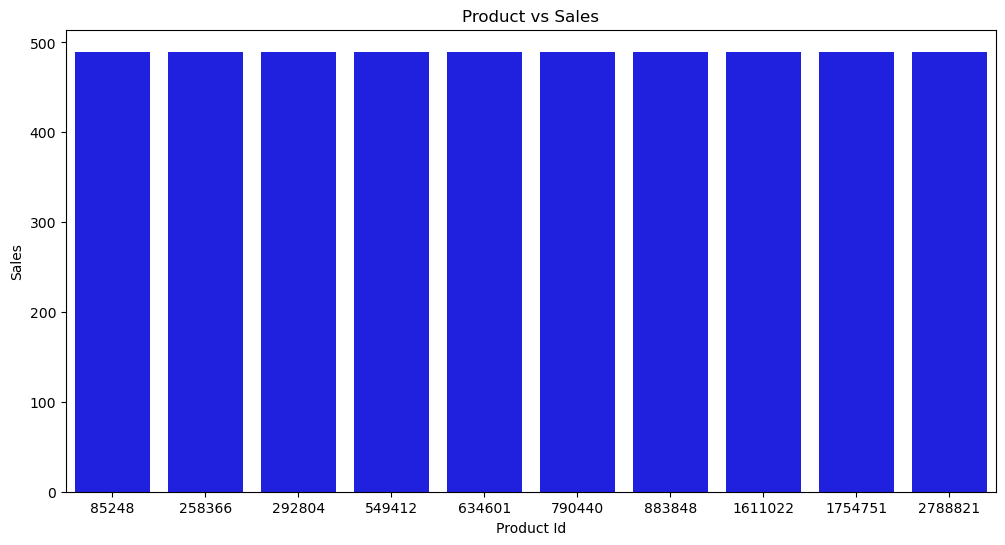

In [41]:
# Product name isnt mention in the dataset so i use their ids
plt.figure(figsize=(12,6))
sns.barplot(x=prod_sale.index , y=prod_sale.values , color='blue')
plt.title("Product vs Sales")
plt.xlabel("Product Id")
plt.ylabel("Sales")

plt.show()

In [42]:
import matplotlib.dates as mdates

## Aggregate Sales By Date

In [43]:
daily_sale = train.groupby('date')['sales'].sum()
daily_sale

date
2013-01-01      1001.618999
2013-01-02     70050.948974
2013-01-03     70559.120014
2013-01-04     67484.706983
2013-01-05     72390.139139
                  ...      
2017-08-11    106679.842032
2017-08-12    116602.805038
2017-08-13    108135.169041
2017-08-14    103371.163021
2017-08-15    103713.938989
Name: sales, Length: 1684, dtype: float64

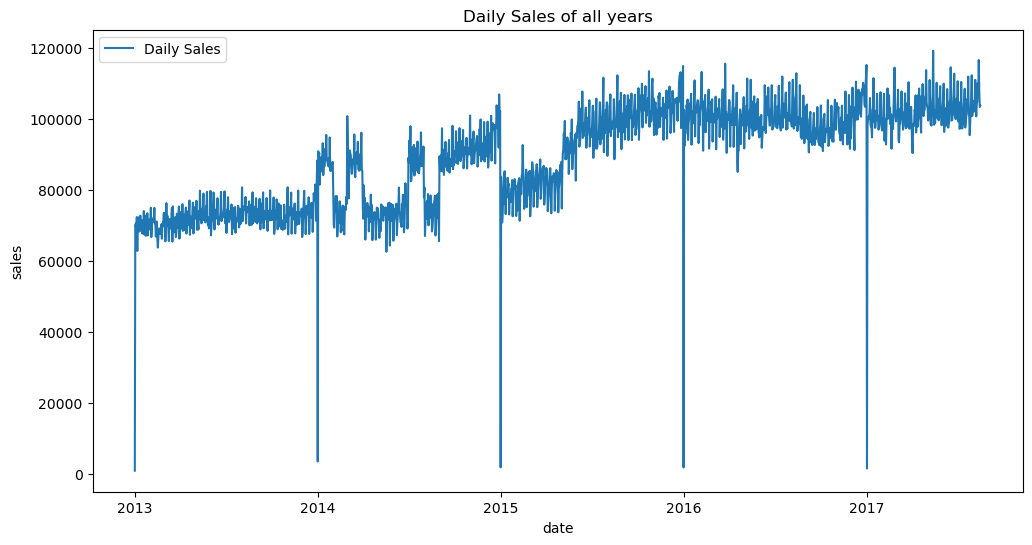

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(daily_sale ,label='Daily Sales')
plt.title("Daily Sales of all years")
plt.show()

### Sales Analysis by week

In [45]:
# weekly sales trend
weekly=daily_sale.resample('w').sum()
weekly

date
2013-01-06    344352.941087
2013-01-13    494390.298047
2013-01-20    489950.548019
2013-01-27    493337.447999
2013-02-03    493598.932988
                  ...      
2017-07-23    726095.515829
2017-07-30    717411.011043
2017-08-06    735370.253024
2017-08-13    751377.772014
2017-08-20    207085.102010
Freq: W-SUN, Name: sales, Length: 242, dtype: float64

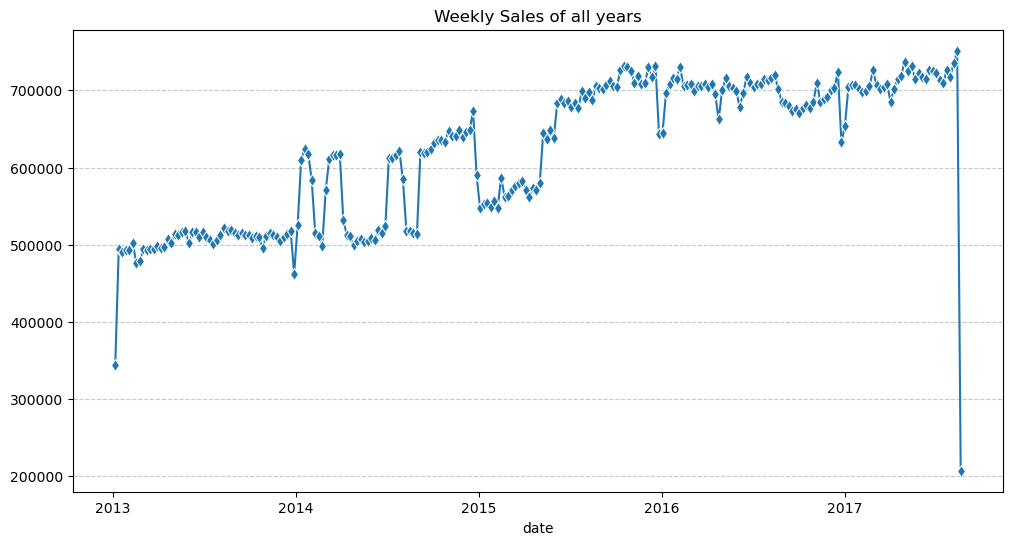

In [46]:
# Weekly sales
plt.figure(figsize=(12,6))
sns.lineplot(x=weekly.index , y=weekly.values ,marker="d")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Weekly Sales of all years")
plt.show()

## Monthly Sales Analysis

In [47]:
monthly =daily_sale.resample('M').sum()
monthly

date
2013-01-31    2.104213e+06
2013-02-28    1.954069e+06
2013-03-31    2.189832e+06
2013-04-30    2.148487e+06
2013-05-31    2.270058e+06
2013-06-30    2.206267e+06
2013-07-31    2.238464e+06
2013-08-31    2.300176e+06
2013-09-30    2.196697e+06
2013-10-31    2.238440e+06
2013-11-30    2.199919e+06
2013-12-31    2.241398e+06
2014-01-31    2.642779e+06
2014-02-28    2.052353e+06
2014-03-31    2.739555e+06
2014-04-30    2.188843e+06
2014-05-31    2.244970e+06
2014-06-30    2.200511e+06
2014-07-31    2.749818e+06
2014-08-31    2.289877e+06
2014-09-30    2.658691e+06
2014-10-31    2.818416e+06
2014-11-30    2.760540e+06
2014-12-31    2.867264e+06
2015-01-31    2.377678e+06
2015-02-28    2.259706e+06
2015-03-31    2.542540e+06
2015-04-30    2.449020e+06
2015-05-31    2.817434e+06
2015-06-30    2.933431e+06
2015-07-31    3.041853e+06
2015-08-31    3.089193e+06
2015-09-30    3.023285e+06
2015-10-31    3.218620e+06
2015-11-30    3.054183e+06
2015-12-31    3.164619e+06
2016-01-31    3.032477e

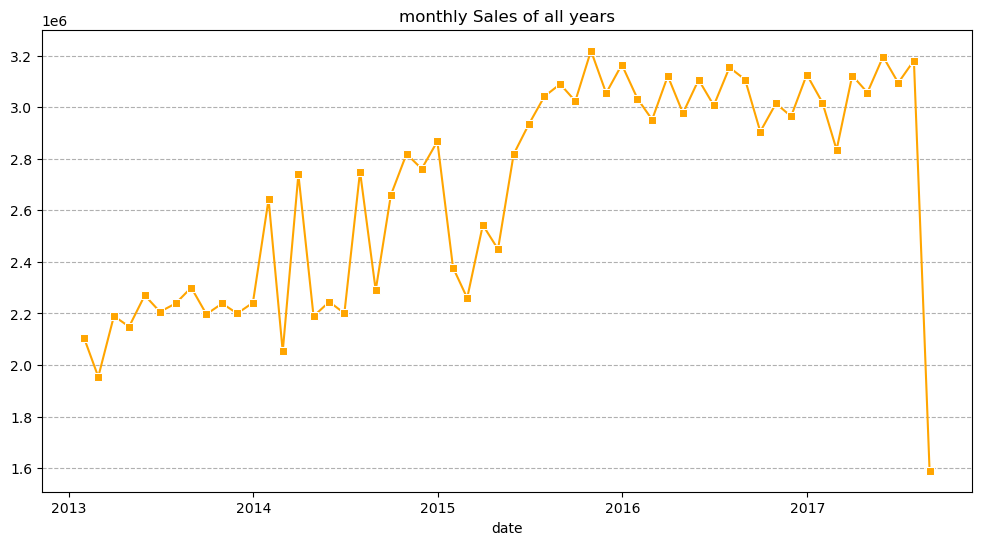

In [48]:
# monthly sales
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly.index , y=monthly.values, color='orange' ,marker="s")
plt.grid(axis="y", linestyle="--")
plt.title("monthly Sales of all years")
plt.show()

## Sales Trend by Quarter

In [49]:
quarter =daily_sale.resample('Q').sum()
quarter

date
2013-03-31    6.248114e+06
2013-06-30    6.624813e+06
2013-09-30    6.735337e+06
2013-12-31    6.679757e+06
2014-03-31    7.434687e+06
2014-06-30    6.634324e+06
2014-09-30    7.698386e+06
2014-12-31    8.446219e+06
2015-03-31    7.179924e+06
2015-06-30    8.199885e+06
2015-09-30    9.154331e+06
2015-12-31    9.437422e+06
2016-03-31    9.104545e+06
2016-06-30    9.088648e+06
2016-09-30    9.165143e+06
2016-12-31    9.104317e+06
2017-03-31    8.974333e+06
2017-06-30    9.345997e+06
2017-09-30    4.770641e+06
Freq: Q-DEC, Name: sales, dtype: float64

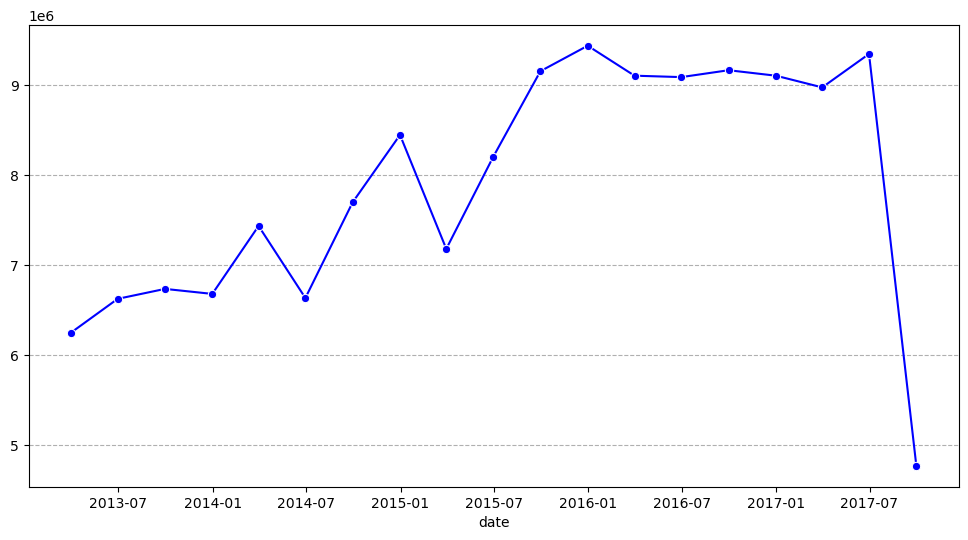

In [50]:
# Quarter sales

plt.figure(figsize=(12,6))
sns.lineplot(x=quarter.index , y=quarter.values, color='blue' , marker="o")
plt.grid(axis="y", linestyle="--")
plt.show()

## Promotion and Holiday Impact

### Lets merge train and holidays dataset

In [51]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [52]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [53]:
train_holidays= pd.merge(train , holidays , how='left' , on='date')
train_holidays

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...
2598407,3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
2598408,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
2598409,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False
2598410,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [54]:
# checking for null values in new dataset
train_holidays.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
type           2175050
locale         2175050
locale_name    2175050
description    2175050
transferred    2175050
dtype: int64

In [55]:
# lets address this issue , handling with these Nan values

In [56]:
train_holidays['type']=train_holidays['type'].fillna('Non-Holiday')

In [57]:
# now lets put 0 in rest of columns because we find the holidays impact ,we dont need them for now
train_holidays=train_holidays.fillna(0)

In [58]:
# lets check it again

train_holidays.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

## Holidays impact on sales

In [59]:
holi_sales = train_holidays.groupby('type')['sales'].sum().sort_values(ascending=False)
holi_sales

type
Non-Holiday    1.274109e+08
Holiday        1.490714e+07
Event          5.253147e+06
Additional     3.679894e+06
Transfer       8.894176e+05
Work Day       4.299562e+05
Bridge         2.835779e+05
Name: sales, dtype: float64

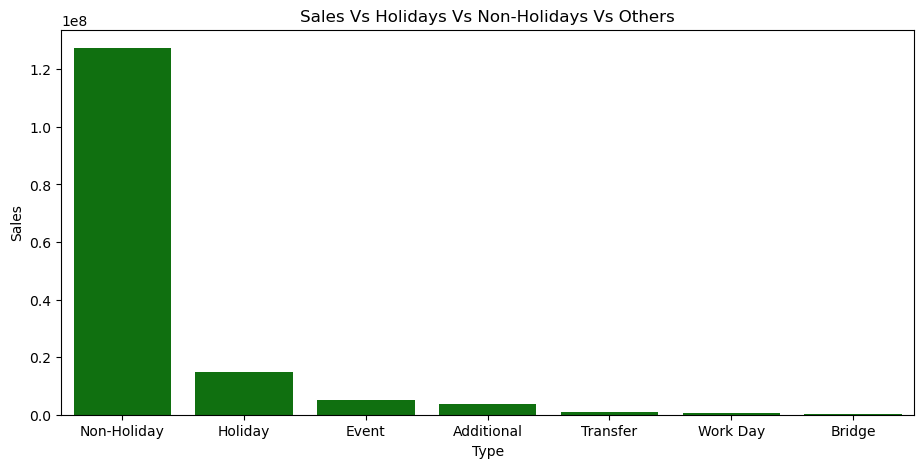

In [60]:
plt.figure(figsize=(11,5))
sns.barplot(x=holi_sales.index , y=holi_sales.values ,color='green')
plt.title("Sales Vs Holidays Vs Non-Holidays Vs Others")
plt.xlabel("Type")
plt.ylabel("Sales")
plt.show()

In [61]:
train['onpromotion'].unique()

array([  0,  20,  19,   3,   1,  56,  18,   2,  50,  17,  16,  42,  51,
         5,   4,  47,  21,  40,  12,  37,  54,  58,  22,  59,  13,  45,
        25,  55,  26,   7,  14,  28,  32,  57,  27,   6,  41,  15,  30,
        53,  23,  48,  35,  29,  36,  10,  11,  43,   9,  44,  31,  52,
         8,  39,  33,  49,  24,  34,  38,  46,  61,  60,  65,  64,  67,
        78,  62,  70,  68,  76,  72,  66,  73,  69,  63,  80,  71,  81,
        87,  75,  83, 107, 104, 100, 102,  90,  94,  74, 108, 103,  95,
        82,  79,  77,  84,  96, 105, 114, 106,  97,  89, 110, 109, 101,
        99,  88,  98,  92, 111,  85,  93, 116, 112,  86, 113, 120,  91,
       119, 123, 115, 117, 122, 127, 279, 128, 121, 118, 126, 138, 125],
      dtype=int64)

## Sales impact on onpromotion

In [62]:
promo_sales = train.groupby('onpromotion')['sales'].sum().sort_values(ascending=False).head(15)
promo_sales

onpromotion
0     9.247876e+07
1     1.678254e+07
2     7.777749e+06
3     4.491882e+06
4     3.222884e+06
5     2.680579e+06
6     2.527794e+06
7     2.263431e+06
8     1.920214e+06
9     1.684129e+06
10    1.517026e+06
11    1.318742e+06
12    1.186843e+06
13    9.520789e+05
14    7.734246e+05
Name: sales, dtype: float64

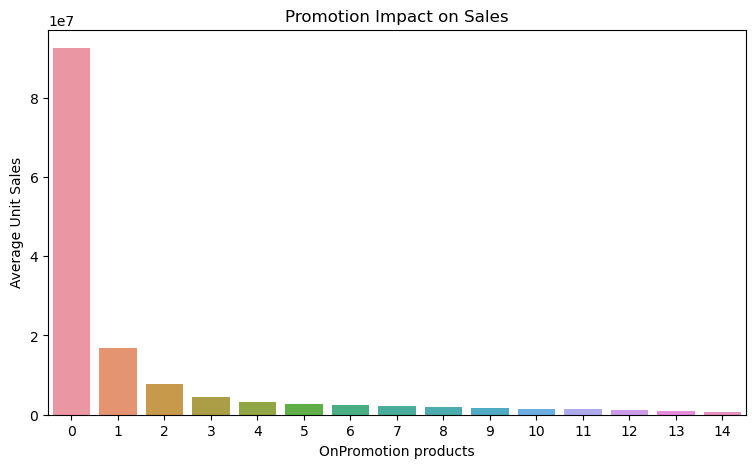

In [63]:
plt.figure(figsize=(9,5))
sns.barplot(x=promo_sales.index , y=promo_sales.values )
plt.title('Promotion Impact on Sales')
plt.ylabel('Average Unit Sales')
plt.xlabel('OnPromotion products')
plt.show()


## Sales and onpromotion Relationship

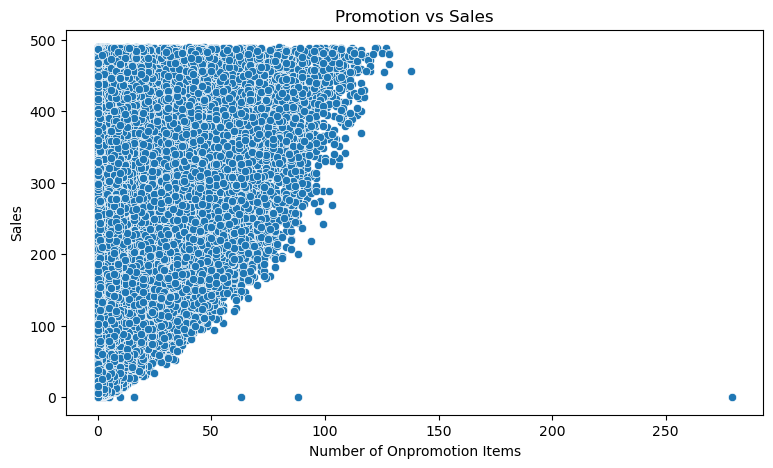

In [64]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=train['onpromotion'] , y= train['sales'] , data=train)
plt.title('Promotion vs Sales')
plt.ylabel('Sales')
plt.xlabel('Number of Onpromotion Items')
plt.show()

# This indicates that most promotions are for fewer items

## Oil Price impact on sales

In [65]:
# see oil dataset
oil.head()

,date,dcoilwtico
0,2013-01-01,0.00
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [66]:
# first merge train and oil datasets
train_oil= pd.merge(train , oil, how='left' , on='date')
train_oil

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,0.00
1,1,2013-01-01,1,BABY CARE,0.000,0,0.00
2,2,2013-01-01,1,BEAUTY,0.000,0,0.00
3,3,2013-01-01,1,BEVERAGES,0.000,0,0.00
4,4,2013-01-01,1,BOOKS,0.000,0,0.00
...,...,...,...,...,...,...,...
2553778,3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0,47.57
2553779,3000883,2017-08-15,9,POULTRY,438.133,0,47.57
2553780,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
2553781,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [67]:
# checking for new null values
train_oil.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
dcoilwtico     710952
dtype: int64

In [68]:
train_oil['dcoilwtico']=train_oil['dcoilwtico'].fillna(0)

In [69]:
# null values has been removed
train_oil.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
dtype: int64

In [70]:
corr= train_oil[['dcoilwtico','sales']].corr()
corr

,dcoilwtico,sales
dcoilwtico,1.000000,-0.043867
sales,-0.043867,1.000000


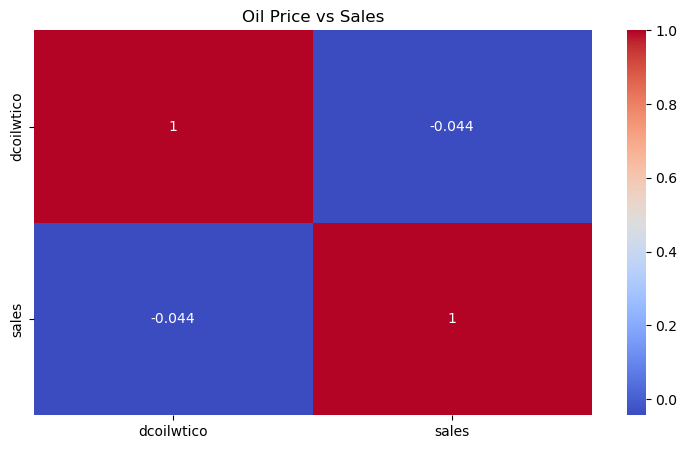

In [71]:
plt.figure(figsize=(9,5))
sns.heatmap(corr, annot=True , cmap='coolwarm')
plt.title('Oil Price vs Sales')
plt.show()
# Both shows negative relation with each other, oil price increases , sales decreases and vice versa
# it might be because of so many null values has been converted to 0 .

# Feature engineering & Preprocessing for model

In [72]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [73]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [74]:
# Extracting year,month , days from date

train['year']=train['date'].dt.year
train['month']=train['date'].dt.month

train['day']=train['date'].dt.day



In [75]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1


In [76]:
# We need to align some feature for test data

test['year']=test['date'].dt.year
test['month']=test['date'].dt.month
test['day']=test['date'].dt.day


In [77]:
test.head()

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2553783 entries, 0 to 3000887
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int32         
 7   month        int32         
 8   day          int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(3), object(1)
memory usage: 165.6+ MB


In [79]:
# we dont need date  further
train=train.drop(columns=['date'])

In [80]:
# same for test date column remove
test=test.drop(columns=['date'])

In [82]:
train.head() , test.head()

(   id  store_nbr      family  sales  onpromotion  year  month  day
 0   0          1  AUTOMOTIVE    0.0            0  2013      1    1
 1   1          1   BABY CARE    0.0            0  2013      1    1
 2   2          1      BEAUTY    0.0            0  2013      1    1
 3   3          1   BEVERAGES    0.0            0  2013      1    1
 4   4          1       BOOKS    0.0            0  2013      1    1,
         id  store_nbr      family  onpromotion  year  month  day
 0  3000888          1  AUTOMOTIVE            0  2017      8   16
 1  3000889          1   BABY CARE            0  2017      8   16
 2  3000890          1      BEAUTY            2  2017      8   16
 3  3000891          1   BEVERAGES           20  2017      8   16
 4  3000892          1       BOOKS            0  2017      8   16)

## Label encoding for strings

In [83]:
from sklearn.preprocessing  import LabelEncoder

le=LabelEncoder()
train['family']=le.fit_transform(train['family'])
train['family'].head()

0    0
1    1
2    2
3    3
4    4
Name: family, dtype: int32

# Modeling to predict the sales on given input

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [85]:
X=train[['id','store_nbr','family','onpromotion','year','month','day']]
y=train['sales']

In [86]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.2 , random_state=42)

In [87]:
# taking sample of train data , because it contains too many rows which need large memory to allocate
X_train_sampled, new_x_val, y_train_sampled, new_y_val = train_test_split( X_train, y_train)


In [88]:
model=RandomForestRegressor(n_estimators=100, random_state=42)

In [89]:
model.fit(X_train_sampled,y_train_sampled)

RandomForestRegressor(random_state=42)

In [90]:
y_pred=model.predict(new_x_val)

# Model Evaluation

In [91]:
r2score=r2_score(new_y_val, y_pred)

print("your model accuracy score is:", r2score )

your model accuracy score is: 0.9019597332101518


In [95]:
test.head()

,id,store_nbr,family,onpromotion,year,month,day
0,3000888,1,AUTOMOTIVE,0,2017,8,16
1,3000889,1,BABY CARE,0,2017,8,16
2,3000890,1,BEAUTY,2,2017,8,16
3,3000891,1,BEVERAGES,20,2017,8,16
4,3000892,1,BOOKS,0,2017,8,16


# Forecasting on test data

In [96]:
# need to encode the catagorical data into numeric format
le=LabelEncoder()
test['family']=le.fit_transform(test['family'])


In [97]:
test['unit_sales']=model.predict(test[['id','store_nbr','family','onpromotion','year','month','day']])

In [100]:
test['unit_sales']

0          2.23000
1          0.00000
2          5.98000
3        306.71031
4          0.04000
           ...    
28507    339.68118
28508     71.30642
28509    206.20151
28510    151.79783
28511     22.60481
Name: unit_sales, Length: 28512, dtype: float64